<a href="https://colab.research.google.com/github/JaimeMejia-data/crime-prediction-ml/blob/main/Crimeprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install dmba

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 125.4 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np

# Data Prep

In [ ]:
crime_df = pd.read_csv("Chicago_Crimes_2012_to_2017.csv")
crime_df.columns = [c.replace(' ', '_') for c in crime_df.columns]
crime_df.head()

<ipython-input-3-0a72fafb393b>:1: DtypeWarning: Columns (9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  crime_df = pd.read_csv("Chicago_Crimes_2012_to_2017.csv")


,Unnamed:_0,ID,Case_Number,Date,Block,IUCR,Primary_Type,Description,Location_Description,Arrest,...,Ward,Community_Area,FBI_Code,X_Coordinate,Y_Coordinate,Year,Updated_On,Latitude,Longitude,Location
0,3,10508693,HZ250496,05/03/2016 11:40:00 PM,013XX S SAWYER AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,...,24.0,29.0,08B,1154907.0,1893681.0,2016.0,05/10/2016 03:56:50 PM,41.864073,-87.706819,"(41.864073157, -87.706818608)"
1,89,10508695,HZ250409,05/03/2016 09:40:00 PM,061XX S DREXEL AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,...,20.0,42.0,08B,1183066.0,1864330.0,2016.0,05/10/2016 03:56:50 PM,41.782922,-87.604363,"(41.782921527, -87.60436317)"
2,197,10508697,HZ250503,05/03/2016 11:31:00 PM,053XX W CHICAGO AVE,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,...,37.0,25.0,24,1140789.0,1904819.0,2016.0,05/10/2016 03:56:50 PM,41.894908,-87.758372,"(41.894908283, -87.758371958)"
3,673,10508698,HZ250424,05/03/2016 10:10:00 PM,049XX W FULTON ST,0460,BATTERY,SIMPLE,SIDEWALK,False,...,28.0,25.0,08B,1143223.0,1901475.0,2016.0,05/10/2016 03:56:50 PM,41.885687,-87.749516,"(41.885686845, -87.749515983)"
4,911,10508699,HZ250455,05/03/2016 10:00:00 PM,003XX N LOTUS AVE,0820,THEFT,$500 AND UNDER,RESIDENCE,False,...,28.0,25.0,06,1139890.0,1901675.0,2016.0,05/10/2016 03:56:50 PM,41.886297,-87.761751,"(41.886297242, -87.761750709)"


In [ ]:
crime_df.drop(columns=['Unnamed:_0', 'ID', 'Case_Number', 'Date', 'Block','IUCR', 'X_Coordinate', 'Y_Coordinate', 'Updated_On', 'Latitude', 'Longitude', 'Location'], inplace=True) #drop undesired columns
crime_df.head()

,Primary_Type,Description,Location_Description,Arrest,Domestic,Beat,District,Ward,Community_Area,FBI_Code,Year
0,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,True,1022.0,10.0,24.0,29.0,08B,2016.0
1,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,313.0,3.0,20.0,42.0,08B,2016.0
2,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,False,1524.0,15.0,37.0,25.0,24,2016.0
3,BATTERY,SIMPLE,SIDEWALK,False,False,1532.0,15.0,28.0,25.0,08B,2016.0
4,THEFT,$500 AND UNDER,RESIDENCE,False,True,1523.0,15.0,28.0,25.0,06,2016.0


In [ ]:
variables = ['Primary_Type', 'Description', 'Location_Description','Arrest', 'Domestic', 'FBI_Code'] #List the columns you want to convert to category type
# Convert each column to categorical type individually
for col in variables:
    crime_df[col] = pd.Categorical(crime_df[col])

# Access 'cat.codes' for each categorical column
for col in variables:
    crime_df[col] = crime_df[col].cat.codes

crime_df.head()

,Primary_Type,Description,Location_Description,Arrest,Domestic,Beat,District,Ward,Community_Area,FBI_Code,Year
0,2,104,17,1,1,1022.0,10.0,24.0,29.0,10,2016.0
1,2,104,84,0,1,313.0,3.0,20.0,42.0,10,2016.0
2,26,233,97,0,0,1524.0,15.0,37.0,25.0,24,2016.0
3,2,247,94,0,0,1532.0,15.0,28.0,25.0,10,2016.0
4,30,0,84,0,1,1523.0,15.0,28.0,25.0,7,2016.0


In [ ]:
crime_df.isnull().sum()

,0
Primary_Type,0
Description,0
Location_Description,0
Arrest,0
Domestic,0
Beat,1
District,1
Ward,5
Community_Area,39
FBI_Code,0


In [ ]:
crime_df = crime_df.dropna()
crime_df.shape

(159305, 11)

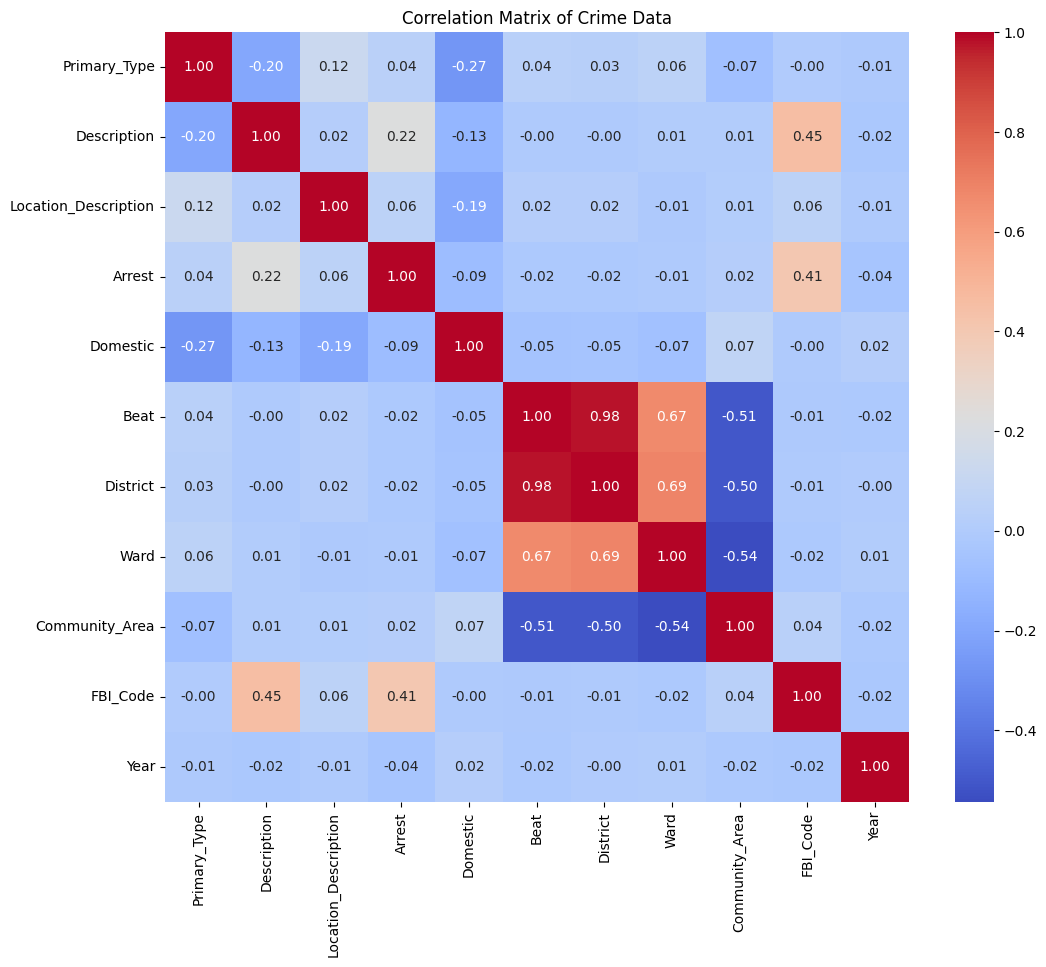

In [ ]:
#HeatMap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
sns.heatmap(crime_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Crime Data')
plt.show()

In [ ]:
for col in crime_df.corr().columns:
  for row in crime_df.corr().columns:
    # Get the correlation value for the current column and row
    correlation = crime_df.corr().loc[row, col]
    # Check if the correlation is greater than 0.5 and not 1 (to avoid comparing a variable with itself)
    if (correlation > 0.5 or correlation < -0.5) and correlation != 1:
      print(f"Correlation between {col} and {row}: {correlation}")

Correlation between Beat and District: 0.9791053420120278
Correlation between Beat and Ward: 0.6726040281640374
Correlation between Beat and Community_Area: -0.5058112506565935
Correlation between District and Beat: 0.9791053420120278
Correlation between District and Ward: 0.6917782496134014
Correlation between District and Community_Area: -0.5036161006428918
Correlation between Ward and Beat: 0.6726040281640374
Correlation between Ward and District: 0.6917782496134014
Correlation between Ward and Community_Area: -0.5441479345306827
Correlation between Community_Area and Beat: -0.5058112506565935
Correlation between Community_Area and District: -0.5036161006428918
Correlation between Community_Area and Ward: -0.5441479345306827


In [ ]:
crime_df.drop(columns=['Beat', 'Ward', 'Community_Area'], inplace=True) #drop undesired columns
crime_df.corr()

,Primary_Type,Description,Location_Description,Arrest,Domestic,District,FBI_Code,Year
Primary_Type,1.000000,-0.197608,0.124898,0.043458,-0.268539,0.033097,-0.001244,-0.011460
Description,-0.197608,1.000000,0.018371,0.223215,-0.125761,-0.001819,0.452439,-0.021377
Location_Description,0.124898,0.018371,1.000000,0.056328,-0.193822,0.018210,0.055001,-0.006504
Arrest,0.043458,0.223215,0.056328,1.000000,-0.087548,-0.015923,0.405269,-0.041536
Domestic,-0.268539,-0.125761,-0.193822,-0.087548,1.000000,-0.049085,-0.004214,0.019080
District,0.033097,-0.001819,0.018210,-0.015923,-0.049085,1.000000,-0.007250,-0.000620
FBI_Code,-0.001244,0.452439,0.055001,0.405269,-0.004214,-0.007250,1.000000,-0.021935
Year,-0.011460,-0.021377,-0.006504,-0.041536,0.019080,-0.000620,-0.021935,1.000000


In [ ]:
######## Added after presentation

#crime_df.drop_duplicates(inplace=True)
#crime_df.shape

In [ ]:
crime_df.head()

,Primary_Type,Description,Location_Description,Arrest,Domestic,District,FBI_Code,Year
0,2,104,17,1,1,10.0,10,2016.0
1,2,104,84,0,1,3.0,10,2016.0
2,26,233,97,0,0,15.0,24,2016.0
3,2,247,94,0,0,15.0,10,2016.0
4,30,0,84,0,1,15.0,7,2016.0


# Visuals for Slides

In [ ]:
original_crime_df = pd.read_csv("Chicago_Crimes_2012_to_2017.csv")
primary_type_mapping = dict(enumerate(original_crime_df['Primary Type'].astype('category').cat.categories))

for code, value in primary_type_mapping.items():
    print(f"Code {code}: {value}")

theft_code = [k for k, v in primary_type_mapping.items() if v == 'THEFT'][0]
print(f"\nThe numerical code for 'THEFT' is: {theft_code}")

Code 0: ARSON
Code 1: ASSAULT
Code 2: BATTERY
Code 3: BURGLARY
Code 4: CONCEALED CARRY LICENSE VIOLATION
Code 5: CRIM SEXUAL ASSAULT
Code 6: CRIMINAL DAMAGE
Code 7: CRIMINAL TRESPASS
Code 8: DECEPTIVE PRACTICE
Code 9: GAMBLING
Code 10: HOMICIDE
Code 11: HUMAN TRAFFICKING
Code 12: INTERFERENCE WITH PUBLIC OFFICER
Code 13: INTIMIDATION
Code 14: KIDNAPPING
Code 15: LIQUOR LAW VIOLATION
Code 16: MOTOR VEHICLE THEFT
Code 17: NARCOTICS
Code 18: NON - CRIMINAL
Code 19: NON-CRIMINAL
Code 20: NON-CRIMINAL (SUBJECT SPECIFIED)
Code 21: OBSCENITY
Code 22: OFFENSE INVOLVING CHILDREN
Code 23: OTHER NARCOTIC VIOLATION
Code 24: OTHER OFFENSE
Code 25: PROSTITUTION
Code 26: PUBLIC INDECENCY
Code 27: PUBLIC PEACE VIOLATION
Code 28: ROBBERY
Code 29: SEX OFFENSE
Code 30: STALKING
Code 31: THEFT
Code 32: WEAPONS VIOLATION

The numerical code for 'THEFT' is: 31


<ipython-input-14-c162a2e359c9>:4: DtypeWarning: Columns (9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  original_crime_df = pd.read_csv("Chicago_Crimes_2012_to_2017.csv")


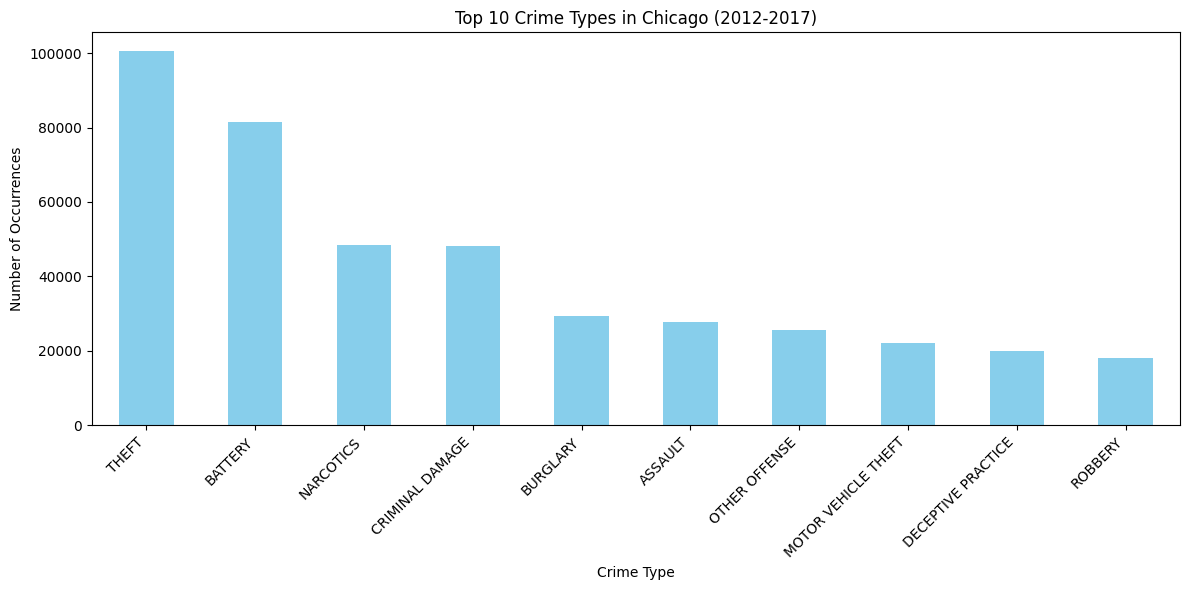

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

original_crime_df = pd.read_csv("Chicago_Crimes_2012_to_2017.csv")

crime_type_counts = original_crime_df['Primary Type'].value_counts().head(10)

plt.figure(figsize=(12, 6))
crime_type_counts.plot(kind='bar', color='skyblue')

plt.title('Top 10 Crime Types in Chicago (2012-2017)')
plt.xlabel('Crime Type')
plt.ylabel('Number of Occurrences')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

<ipython-input-16-6a3136b8ab5d>:4: DtypeWarning: Columns (9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  original_crime_df = pd.read_csv("Chicago_Crimes_2012_to_2017.csv")


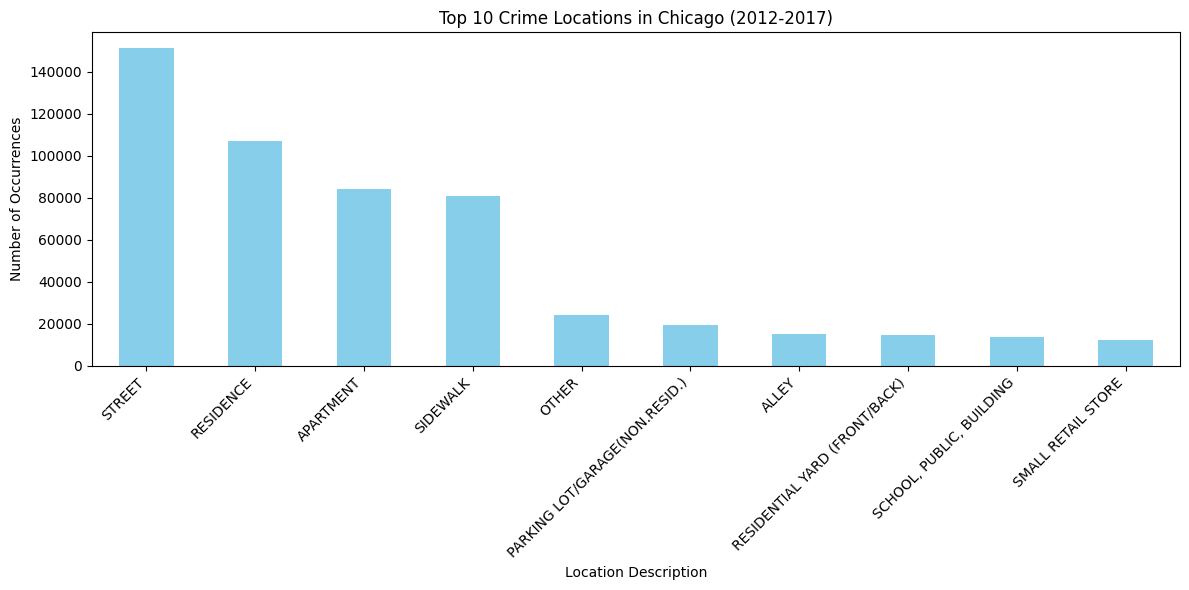

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

original_crime_df = pd.read_csv("Chicago_Crimes_2012_to_2017.csv")

location_counts = original_crime_df['Location Description'].value_counts().head(10)

plt.figure(figsize=(12, 6))
location_counts.plot(kind='bar', color='skyblue')
plt.title('Top 10 Crime Locations in Chicago (2012-2017)')
plt.xlabel('Location Description')
plt.ylabel('Number of Occurrences')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

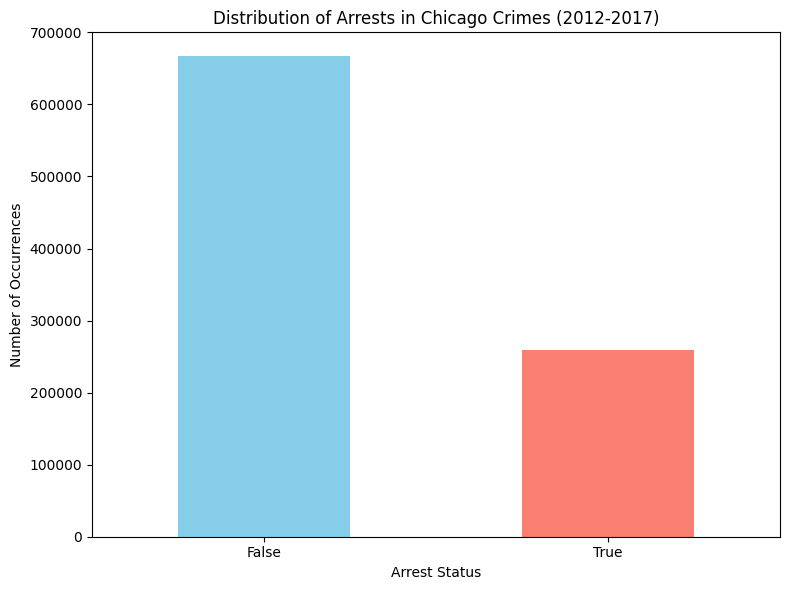

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

original_crime_df = pd.read_csv("Chicago_Crimes_2012_to_2017.csv")

arrest_counts = original_crime_df['Arrest'].value_counts()

plt.figure(figsize=(8, 6))
arrest_counts.plot(kind='bar', color=['skyblue', 'salmon'])

plt.title('Distribution of Arrests in Chicago Crimes (2012-2017)')
plt.xlabel('Arrest Status')
plt.ylabel('Number of Occurrences')
plt.xticks(rotation=0)
plt.tight_layout()

plt.show()

# Random Forest

In [ ]:
from sklearn.metrics import confusion_matrix
from dmba import classificationSummary
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import dmba

Colab environment detected.


In [ ]:
X = crime_df.drop(columns=['Arrest'])
y = crime_df['Arrest']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
rf = RandomForestClassifier(random_state=1, n_estimators=100, max_depth=10, min_samples_split=10, min_samples_leaf=5, max_features='sqrt')

rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=5, min_samples_split=10,
                       random_state=1)

In [ ]:
classificationSummary(y_train, rf.predict(X_train))

Confusion Matrix (Accuracy 0.8902)

       Prediction
Actual     0     1
     0 83424  2025
     1 11093 22936


In [ ]:
classificationSummary(y_test, rf.predict(X_test))

Confusion Matrix (Accuracy 0.8878)

       Prediction
Actual     0     1
     0 27729   688
     1  3782  7628


# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from dmba import plotDecisionTree

In [ ]:
ClassTree = DecisionTreeClassifier(random_state=1, max_depth=6, min_samples_split=10, min_samples_leaf=4)
ClassTree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=4, min_samples_split=10,
                       random_state=1)

In [ ]:
classificationSummary(y_train, ClassTree.predict(X_train))

Confusion Matrix (Accuracy 0.8845)

       Prediction
Actual     0     1
     0 83087  2362
     1 11440 22589


In [ ]:
classificationSummary(y_test, ClassTree.predict(X_test))

Confusion Matrix (Accuracy 0.8833)

       Prediction
Actual     0     1
     0 27646   771
     1  3877  7533


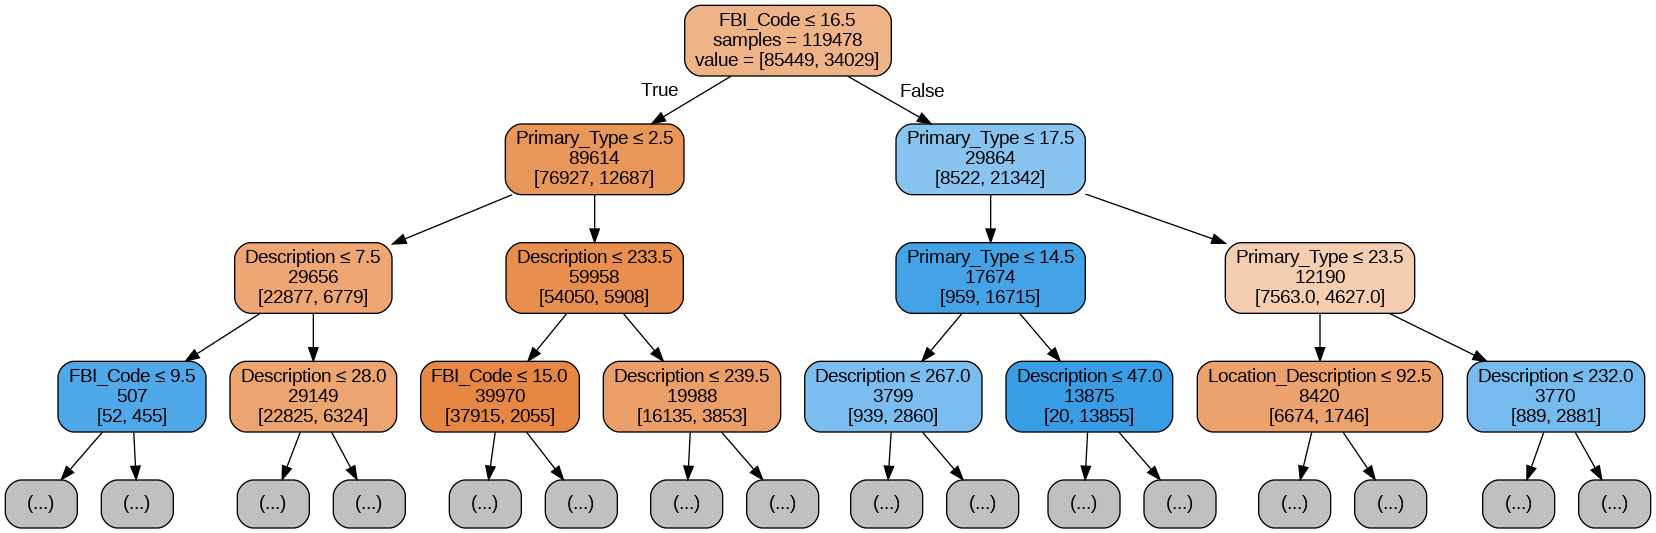

In [ ]:
plotDecisionTree(ClassTree, feature_names=X_train.columns, max_depth=3)

In [ ]:
from scipy import stats

In [ ]:
# Display the initial shape of the dataset
print("Original dataset shape:", crime_df.shape)

# Select only numeric columns for outlier analysis and clustering
numeric_cols = crime_df.select_dtypes(include=[np.number]).columns

# Compute the z-scores for numeric columns
z_scores = np.abs(stats.zscore(crime_df[numeric_cols]))

# Define the threshold for determining outliers (commonly 3)
threshold = 3

# Create a mask that is True for rows with all z-scores below the threshold
mask = (z_scores < threshold).all(axis=1)

# Remove rows that have any outlier values
crime_df_cleaned = crime_df[mask]

# Display the shape of the dataset after removing outliers
print("Cleaned dataset shape:", crime_df_cleaned.shape)

Original dataset shape: (159305, 8)
Cleaned dataset shape: (159305, 8)


# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logit_reg = LogisticRegression(max_iter=1000)
logit_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
classificationSummary(y_train, logit_reg.predict(X_train))

Confusion Matrix (Accuracy 0.8085)

       Prediction
Actual     0     1
     0 77961  7488
     1 15390 18639


In [ ]:
classificationSummary(y_test, logit_reg.predict(X_test))

Confusion Matrix (Accuracy 0.8058)

       Prediction
Actual     0     1
     0 25880  2537
     1  5197  6213


# Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from dmba import regressionSummary

In [ ]:
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

LinearRegression()

In [ ]:
regressionSummary(y_test, linear_reg.predict(X_test))


Regression statistics

               Mean Error (ME) : 0.0012
Root Mean Squared Error (RMSE) : 0.4115
     Mean Absolute Error (MAE) : 0.3380


# Neural Network

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
clf = MLPClassifier(hidden_layer_sizes=[50], activation='logistic', max_iter=500, random_state=1)
clf.fit(X_train, y_train)

MLPClassifier(activation='logistic', hidden_layer_sizes=[50], max_iter=500,
              random_state=1)

In [ ]:
classificationSummary(y_test, clf.predict(X_test))

Confusion Matrix (Accuracy 0.8570)

       Prediction
Actual     0     1
     0 26845  1572
     1  4123  7287


# Comparing Models

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
models = {
    'RandomForest': rf,
    'LogisticRegression': logit_reg,
    'DecisionTree': ClassTree,
    'NeuralNetwork': clf,
}

# Calculate accuracies
accuracies = {name: accuracy_score(y_test, model.predict(X_test))
              for name, model in models.items()}

# Display results
results = pd.DataFrame(accuracies.items(), columns=['Model', 'Accuracy'])
print(results)
print(f"\nBest model: {max(accuracies, key=accuracies.get)}")

                Model  Accuracy
0        RandomForest  0.887765
1  LogisticRegression  0.805810
2        DecisionTree  0.883295
3       NeuralNetwork  0.857007

Best model: RandomForest


In [ ]:
importances = rf.feature_importances_
feat_imp = pd.Series(importances, index=X_train.columns)

# sort descending
feat_imp.sort_values(ascending=False)

,0
FBI_Code,0.379226
Description,0.264698
Primary_Type,0.263112
Location_Description,0.058609
Domestic,0.016731
District,0.011153
Year,0.006471
